### plot the full choice/reward combination effect on change in beliefs

In [1]:
import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.visualization_utils as visualization_utils

from matplotlib import pyplot as plt
from constants.behavioral_constants import *
from constants.decoding_constants import *
from constants.update_projections_constants import *
import seaborn as sns

In [2]:
subject = "SA"
all_beh = behavioral_utils.load_all_beh_for_sub(subject)
feat_sessions = pd.read_pickle(FEATS_PATH.format(sub=subject))
stats_res = []
for i, row in feat_sessions.iterrows():
    for session in row.sessions:
        sess_beh = all_beh[all_beh.session == session].copy()
        res = behavioral_utils.get_belief_changes_by_obs(sess_beh, row.feat, FULL_CHOICE_REWARD_COMB_MAPS)
        res["feat"] = row.feat
        res["session"] = session
        stats_res.append(res)
stats_res = pd.concat(stats_res)

# HACK: create a shuffle with just copying the results and labeling them all as shuffle...
shuf_res = stats_res.copy()
shuf_res["cond"] = "shuffle"
stats_res = pd.concat((stats_res, shuf_res))

In [3]:
def format_updates(fig, ax):
    ax.axhline(0, color="black", linestyle="dotted", linewidth=1)
    bottom, top = ax.get_ylim()
    max = np.max(np.abs([bottom, top]))
    ax.set_ylim([-max, max])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel(r"$\Delta b(X)$")

    visualization_utils.format_plot(ax)
    # overwriting some default visualizations
    # ax.spines["bottom"].set_visible(False)   # remove axis line
    # ax.tick_params(axis="x", length=0) 
    fig.tight_layout()
    return fig, ax

In [6]:
stats_res.cond.unique()

array(['chose X / correct', 'not chose X / incorrect', 'chose', 'correct',
       'shuffle', 'incorrect', 'not chose', 'not chose X / correct',
       'chose X / incorrect'], dtype=object)

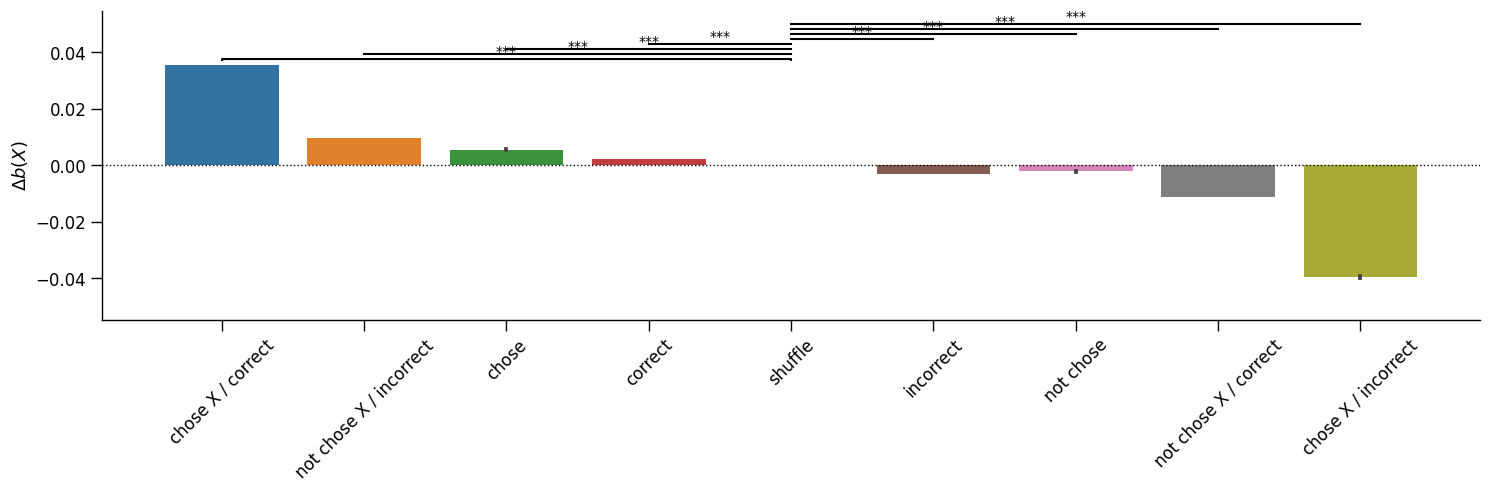

In [7]:
order = ["chose X / correct", "not chose X / incorrect", "chose", "correct", "shuffle", "incorrect", "not chose", "not chose X / correct", "chose X / incorrect"]
sig_pairs = [(o, "shuffle") for o in order if o != "shuffle"]
stats_res = stats_res[stats_res.cond.isin(order)]

stats_res = stats_res.sort_values(by="cond", key=lambda x: x.map(order.index))
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(stats_res, x="cond", y="change in prob", errorbar="se", ax=ax)
visualization_utils.add_significance_bars(fig, ax, stats_res, "cond", "change in prob", pairs=sig_pairs)
fig, ax = format_updates(fig, ax)